# Introduction
**Main goal:** EDA - Important Feature Extractation for Fraud Detection Model Training
- Load Data
- Data Overview
- EDA - Explore Data Analyze


In [13]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lấy đường dẫn thư mục hiện tại
current_dir = os.getcwd()

# Tạo đường dẫn đầy đủ đến file CSV
file_path = os.path.join(current_dir, "..", "data", "Fraud Detection Dataset.csv")

df = pd.read_csv(file_path)
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


# EDA - Explore Data Anaalyst


In [3]:
print(f'Data shape: {df.shape} \n')
print(f'Data Types: {df.dtypes}\n')
for col in df.columns:
    print(f'Unique Data of The {col}:', df[col].unique())

Data shape: (51000, 12) 

Data Types: Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object

Unique Data of The Transaction_ID: ['T1' 'T2' 'T3' ... 'T49998' 'T49999' 'T50000']
Unique Data of The User_ID: [4174 4507 1860 ... 4616 2261 4210]
Unique Data of The Transaction_Amount: [1292.76 1554.58 2395.02 ...  647.11 2446.65 2867.43]
Unique Data of The Transaction_Type: ['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Unique Data of The Time_of_Transaction: [16. 13. nan 15. 19

**Main Goal**: Fully explore the data and find every important feature which might effect to model accuracy
- Firstly, let's handle missing vallue
- Secondly, explore categorical - numerical data

In [ ]:
print(f'Nan Type Values in each columns:\n', df.isnull().sum()) 

Nan Type Values in each columns:
 Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64


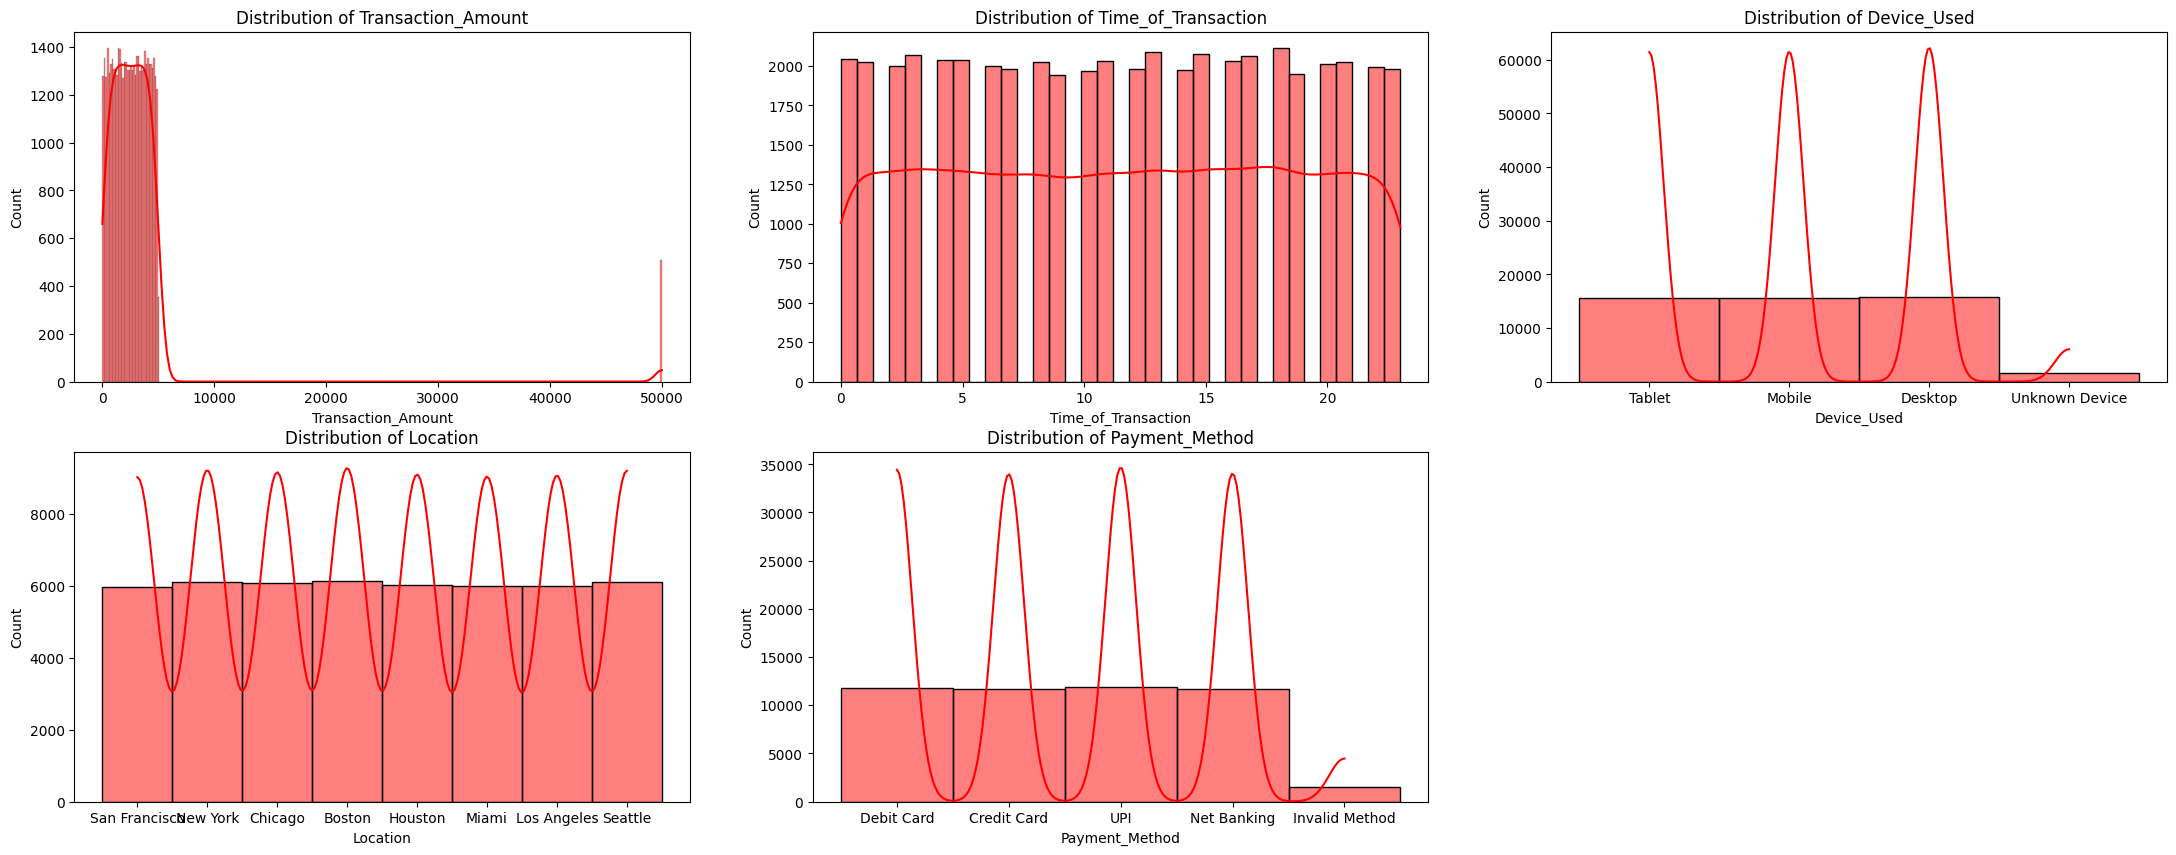

In [ ]:
# Lấy danh sách các cột có giá trị thiếu
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

if missing_cols:  # Kiểm tra có cột nào thiếu không
    num_cols = 3  # Số biểu đồ tối đa mỗi hàng
    num_rows = (len(missing_cols) + num_cols - 1) // num_cols  # Tính số hàng cần thiết

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9 * num_cols, 5 * num_rows))
    
    # Chuyển `axes` thành mảng 2D nếu có nhiều hàng, hoặc mảng 1D nếu chỉ có 1 hàng
    axes = np.array(axes).reshape(num_rows, num_cols)

    # Duyệt qua từng cột có giá trị thiếu để vẽ biểu đồ
    for ax, col in zip(axes.flatten(), missing_cols):
        sns.histplot(df[col], kde=True, ax=ax, color='red')
        ax.set_title(f"Distribution of {col}")

    # Ẩn các ô dư thừa nếu số lượng biểu đồ không lấp đầy toàn bộ grid
    for i in range(len(missing_cols), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()
else:
    print("Không có cột nào chứa giá trị thiếu!")
